In [4]:
names = 'Name1 Surname1, Name2 Surname2'

In [5]:
names_list = names.split(', ')

In [6]:
names_list

['Name1 Surname1', 'Name2 Surname2']

In [105]:
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline 

In [8]:
df = pd.DataFrame([(9002, 1, 'medium', 63),
                   (6722, 1, 'high', 54),
                   (8799, 1, 'high', 62),
                   (8737, 0, 'low', 54),
                   (5208, 0, 'medium', 37)],
                  index=[0, 1, 2, 3, 4],
                  columns=('client_id', 'sex', 'wealth', 'age'))
df

,client_id,sex,wealth,age
0,9002,1,medium,63
1,6722,1,high,54
2,8799,1,high,62
3,8737,0,low,54
4,5208,0,medium,37


In [9]:
medium_35 = df.query("wealth == 'medium' and age > 35")


In [10]:
medium_35

,client_id,sex,wealth,age
0,9002,1,medium,63
4,5208,0,medium,37


In [11]:
df = df.rename(columns={'Клиент id': 'client_id', 
                   'Пол': 'sex', 
                   'Благосостояние': 'wealth', 
                   'Возраст': 'age'})

In [12]:
df

,client_id,sex,wealth,age
0,9002,1,medium,63
1,6722,1,high,54
2,8799,1,high,62
3,8737,0,low,54
4,5208,0,medium,37


In [14]:
df['older_than_30'] = df.age > 30

In [15]:
df

,client_id,sex,wealth,age,older_than_30
0,9002,1,medium,63,True
1,6722,1,high,54,True
2,8799,1,high,62,True
3,8737,0,low,54,True
4,5208,0,medium,37,True


In [16]:
unique_num = df.nunique()

In [17]:
unique_num

client_id        5
sex              2
wealth           3
age              4
older_than_30    1
dtype: int64

In [18]:
data = pd.DataFrame([(5392, 42331, 1585425830),
                   (9581, 88420, 1585429536),
                   (7250, 1714, 1585427761),
                   (8619, 80572, 1585427077),
                   (6573, 57549, 1585426290)],
                  index=[0, 1, 2, 3, 4],
                  columns=('client_id', 'amount', 'date'))
data

,client_id,amount,date
0,5392,42331,1585425830
1,9581,88420,1585429536
2,7250,1714,1585427761
3,8619,80572,1585427077
4,6573,57549,1585426290


In [19]:
full_data = df.merge(data, on='client_id')

In [20]:
full_data

,client_id,sex,wealth,age,older_than_30,amount,date


In [21]:
path_to_file = '3_companies.csv'

In [23]:
file = pd.read_csv(path_to_file, sep=';')

In [24]:
file.head()

,company,income,date
0,"ЗАО «Доронин, Колобов и Калашникова»",1221331958,2019-09-09
1,ООО «Авдеев»,21116804375,1972-12-21
2,РАО «Аксенов Сорокина»,79257158759,2007-03-05
3,Ларионов Инкорпорэйтед,36799366126,2011-08-11
4,Григорьев Инкорпорэйтед,48201837498,1989-09-02


In [26]:
company_income = file \
        .groupby(['company'], as_index=True) \
        .aggregate({'income': 'mean'})
company_income        

,income
company,
En +,9.962187e+10
"АО «Александрова, Савельев и Мельникова»",7.206782e+10
АО «Андреев-Анисимов»,6.931948e+09
АО «Андреев-Макарова»,8.934380e+10
АО «Большаков Кошелева»,7.860861e+10
...,...
Щекиноазот,4.309092e+10
Щукин Лимитед,6.703036e+10
Эйвон Бьюти Продактс Компани (Avon),2.503657e+10


In [27]:
def read_n_agg(path_to_file):
    file = pd.read_csv(path_to_file, sep=';')
    company_income = file \
        .groupby(['company'], as_index=True) \
        .aggregate({'income': 'mean'})
    return company_income

In [28]:
read_n_agg('3_companies.csv')

,income
company,
En +,9.962187e+10
"АО «Александрова, Савельев и Мельникова»",7.206782e+10
АО «Андреев-Анисимов»,6.931948e+09
АО «Андреев-Макарова»,8.934380e+10
АО «Большаков Кошелева»,7.860861e+10
...,...
Щекиноазот,4.309092e+10
Щукин Лимитед,6.703036e+10
Эйвон Бьюти Продактс Компани (Avon),2.503657e+10


In [29]:
import pandas as pd

In [30]:
path_to_file = '3_taxi_peru.csv'

In [52]:
taxi = pd.read_csv(path_to_file, sep=';', parse_dates=['start_at', 'end_at', 'arrived_at'])

In [53]:
taxi.head()

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaT,iPhone,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaT,iPhone,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,"-12,12458801","-77,02896118",not found,NaN,NaN,NaT,iPhone,NaN,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0


/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


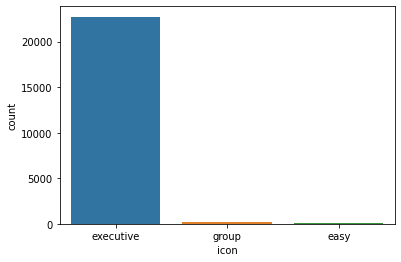

In [54]:
sns.countplot(taxi['icon'])

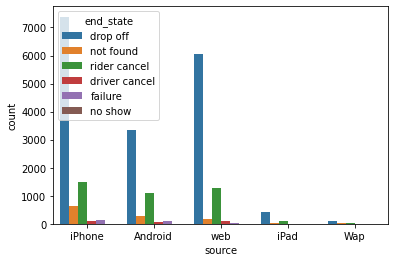

In [56]:
sns.countplot(x=taxi.source, hue=taxi.end_state, data=taxi)

In [42]:
most_order_source = taxi \
        .groupby(['source'], as_index=False) \
        .aggregate({'journey_id': 'count'}) \
        .sort_values('journey_id', ascending=False)
most_order_source   

,source,journey_id
3,iPhone,9741
4,web,7631
0,Android,4909
2,iPad,571
1,Wap,136


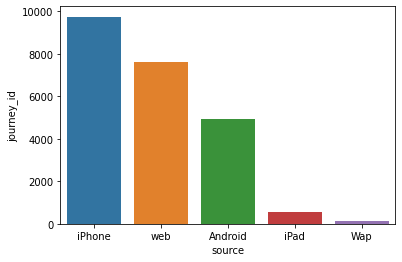

In [51]:
ax = sns.barplot(x="source", y="journey_id", data=most_order_source)

In [46]:
taxi.journey_id.count()

23111

In [49]:
most_order_source['order_percent'] = round(most_order_source.journey_id/taxi.journey_id.count()*100)

In [50]:
most_order_source

,source,journey_id,order_percent
3,iPhone,9741,42.0
4,web,7631,33.0
0,Android,4909,21.0
2,iPad,571,2.0
1,Wap,136,1.0


In [57]:
taxi

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaT,iPhone,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaT,iPhone,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,"-12,12458801","-77,02896118",not found,NaN,NaN,NaT,iPhone,NaN,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23106,4a18ea5737ce0ffecaf20b305a0e2c86,8998bb370b5f0cec43a373adebba0c72,d665fb9f75ef5d9cd0fd89479380ba78,16cbe35db7fff70fbc8251b4cda9fdc9,executive,reserved,2010-07-31 13:15:00,"-12,08974075","-77,04699707",2010-07-31 13:27:00,"-12,08352661","-77,05044556",drop off,"-12,08973527","-77,04787016",2010-07-31 13:15:00,iPhone,5.0,5.0
23107,f1e4317f2c17991dd90d1cd17ae0d399,5f8a6ffef0ea5df78a8ee890267b60ec,17c21284245ff240c7212732991c2373,716a697375634f32a06d692b0448f13d,executive,asap,2010-10-02 05:26:00,"-12,09253011","-77,02875271",2010-10-02 05:56:00,"-12,07776001","-77,05623798",drop off,"-12,10639693","-77,04028948",2010-10-02 05:39:00,Android,NaN,5.0
23108,1e44c0fd0a266c3719ff30410b257bce,c0ffb6f6cd801004dd8609c12277c2d1,4851ee4c867c9b49b909c1adb76c31e9,4851ee4c867c9b49b909c1adb76c538e,executive,asap,2010-09-21 09:56:00,"-12,1275637","-77,02642288",2010-09-21 10:18:00,"-12,10529838","-77,04735249",drop off,"-12,12605017","-77,01882491",2010-09-21 10:05:00,Android,0.0,0.0
23109,7073883383b89ad289e864022150cdd7,c0ffb6f6cd801004dd8609c12277c2d1,56f59b58bcbbd1cdabc3652e713134c2,924d4f0e7554566623e8ebb3904a7b0c,executive,reserved,2010-04-29 04:30:00,"-12,019468","-77,1077669",2010-04-29 05:11:00,"-12,09909987","-77,03475013",drop off,"-12,0710933","-77,09855131",2010-04-29 04:23:00,Android,NaN,5.0


In [58]:
taxi.driver_score.value_counts()

5.0    4499
4.0    1674
0.0    1094
3.0     227
1.0      94
2.0      62
Name: driver_score, dtype: int64

In [94]:
taxi_driver_score = taxi.driver_score.value_counts(normalize=True).mul(100).round(2)

In [95]:
taxi_driver_score

5.0    58.81
4.0    21.88
0.0    14.30
3.0     2.97
1.0     1.23
2.0     0.81
Name: driver_score, dtype: float64

In [96]:
taxi_driver_score = taxi_driver_score.reset_index()

In [97]:
taxi_driver_score

,index,driver_score
0,5.0,58.81
1,4.0,21.88
2,0.0,14.30
3,3.0,2.97
4,1.0,1.23
5,2.0,0.81


In [98]:
correspondance = {'index': 'driver_score', 'driver_score': 'percentage'}


In [99]:
taxi_driver_score = taxi_driver_score.rename(columns=correspondance)

In [100]:
taxi_driver_score

,driver_score,percentage
0,5.0,58.81
1,4.0,21.88
2,0.0,14.30
3,3.0,2.97
4,1.0,1.23
5,2.0,0.81


In [103]:
driver_score_counts = taxi_driver_score.sort_values(['driver_score'], ascending=True)

In [104]:
driver_score_counts

,driver_score,percentage
2,0.0,14.30
4,1.0,1.23
5,2.0,0.81
3,3.0,2.97
1,4.0,21.88
0,5.0,58.81


In [89]:
taxi_driver_score = taxi.driver_score.value_counts(normalize=True).mul(100).round(2)
taxi_driver_score = taxi_driver_score.reset_index()
correspondance = {'index': 'driver_score', 'driver_score': 'percentage'}
taxi_driver_score = taxi_driver_score.rename(columns=correspondance)
driver_score_counts = taxi_driver_score.sort_values(['driver_score'], ascending=True)

In [90]:
driver_score_counts

,driver_score,percentage
0,5.0,58.81
1,4.0,21.88
3,3.0,2.97
5,2.0,0.81
4,1.0,1.23
2,0.0,14.30


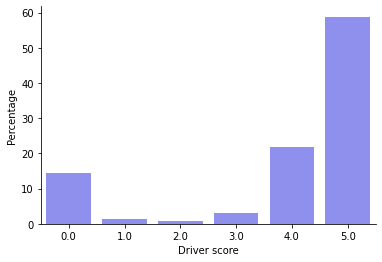

In [108]:
ax = sns.barplot(x='driver_score', y='percentage', data=driver_score_counts, color='blue', alpha=0.5)
ax.set(xlabel='Driver score', ylabel='Percentage')
sns.despine()  # убрать часть рамки графика
plt.show()

In [109]:
taxi_rider_score = taxi.rider_score.value_counts(normalize=True).mul(100).round(2)
taxi_rider_score = taxi_rider_score.reset_index()
correspondance = {'index': 'rider_score', 'rider_score': 'percentage'}
taxi_rider_score = taxi_rider_score.rename(columns=correspondance)
rider_score_counts = taxi_rider_score.sort_values(['rider_score'], ascending=True)

In [110]:
rider_score_counts

,rider_score,percentage
2,0.0,2.29
4,1.0,0.21
5,2.0,0.19
3,3.0,1.38
1,4.0,8.83
0,5.0,87.10


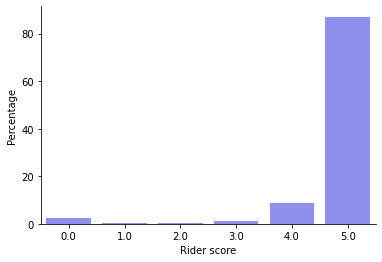

In [111]:
ax = sns.barplot(x='rider_score', y='percentage', data=rider_score_counts, color='blue', alpha=0.5)
ax.set(xlabel='Rider score', ylabel='Percentage')
sns.despine()  # убрать часть рамки графика
plt.show()